In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/проект/twint_emotion.csv")

# EDA

In [ ]:
data.head(5)

,Unnamed: 0.1,Unnamed: 0,id,conversation_id,created_at,date,time,timezone,user_id,username,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,emotion
0,0,10988,1513808669309341696,1513753027504660483,2022-04-12 14:48:06 India Standard Time,2022-04-12,14:48:06,530,1062444987542130689,mottinipaolo,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'FmMosca', 'name': 'Francesco...",NaN,NaN,NaN,NaN,anger
1,1,10989,1513808321261748224,1513808321261748224,2022-04-12 14:46:43 India Standard Time,2022-04-12,14:46:43,530,128860907,corrierecitta,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,fear
2,2,10990,1513808255713263618,1513472929052315652,2022-04-12 14:46:28 India Standard Time,2022-04-12,14:46:28,530,1419298742386180097,catysan21,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'rodcostakiwi', 'name': 'Rodo...",NaN,NaN,NaN,NaN,fear
3,3,10991,1513807833271308289,1513485831335514118,2022-04-12 14:44:47 India Standard Time,2022-04-12,14:44:47,530,1234480280993484800,alberto45109828,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'rodcostakiwi', 'name': 'Rodo...",NaN,NaN,NaN,NaN,anger
4,4,10992,1513807604245536773,1513807604245536773,2022-04-12 14:43:52 India Standard Time,2022-04-12,14:43:52,530,1296134026282115077,italicatestudo,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,anger


<Axes: >

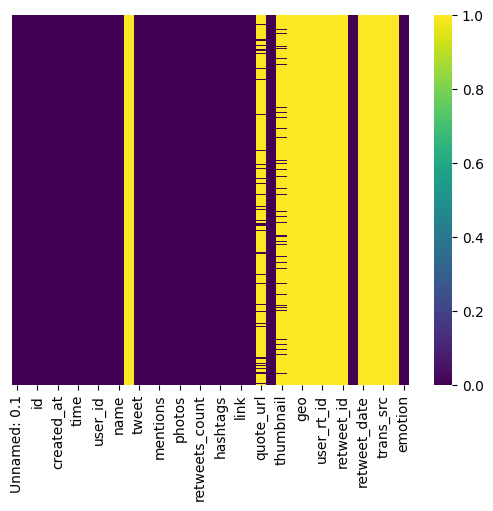

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')

In [ ]:
data.isnull().sum()

Unnamed: 0.1           0
Unnamed: 0             0
id                     0
conversation_id        0
created_at             0
date                   0
time                   0
timezone               0
user_id                0
username               0
name                   6
place              25142
tweet                  0
language               0
mentions               0
urls                   0
photos                 0
replies_count          0
retweets_count         0
likes_count            0
hashtags               0
cashtags               0
link                   0
retweet                0
quote_url          22880
video                  0
thumbnail          23268
near               25152
geo                25152
source             25152
user_rt_id         25152
user_rt            25152
retweet_id         25152
reply_to               0
retweet_date       25152
translate          25152
trans_src          25152
trans_dest         25152
emotion                0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25152 entries, 0 to 25151
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0.1     25152 non-null  int64  
 1   Unnamed: 0       25152 non-null  int64  
 2   id               25152 non-null  int64  
 3   conversation_id  25152 non-null  int64  
 4   created_at       25152 non-null  object 
 5   date             25152 non-null  object 
 6   time             25152 non-null  object 
 7   timezone         25152 non-null  int64  
 8   user_id          25152 non-null  int64  
 9   username         25152 non-null  object 
 10  name             25146 non-null  object 
 11  place            10 non-null     object 
 12  tweet            25152 non-null  object 
 13  language         25152 non-null  object 
 14  mentions         25152 non-null  object 
 15  urls             25152 non-null  object 
 16  photos           25152 non-null  object 
 17  replies_coun

In [ ]:
data.drop(['link','hashtags','name','reply_to','cashtags','urls','mentions','photos','tweet','place','quote_url','thumbnail','near','geo','source','user_rt_id','user_rt','retweet_date','retweet_id','translate','trans_src','trans_dest','Unnamed: 0.1','Unnamed: 0','id','conversation_id','created_at','date','time','timezone','user_id','username'],axis=1,inplace=True)

<Axes: >

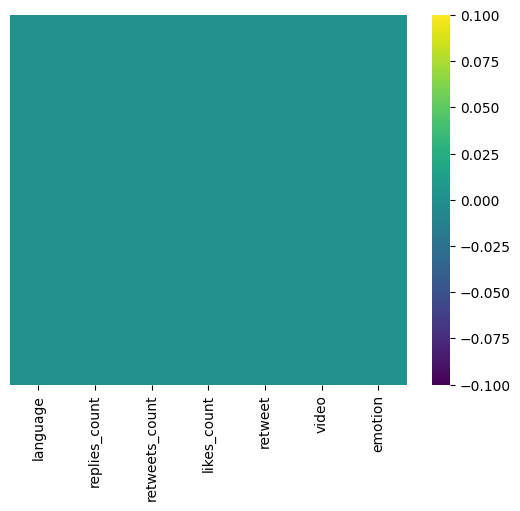

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')

In [ ]:
data.head(5)

,language,replies_count,retweets_count,likes_count,retweet,video,emotion
0,it,0,0,3,False,0,anger
1,it,0,0,0,False,0,fear
2,it,0,0,3,False,0,fear
3,it,0,0,0,False,0,anger
4,it,6,6,31,False,0,anger


In [ ]:
data.shape

(25152, 7)

In [ ]:
data['video'].value_counts()

0    23268
1     1884
Name: video, dtype: int64

In [ ]:
data['language'].value_counts()

it    25152
Name: language, dtype: int64

In [ ]:
data['retweet'].value_counts()

False    25152
Name: retweet, dtype: int64

In [ ]:
data['emotion'].value_counts()

fear       10454
anger       8280
sadness     4215
joy         2203
Name: emotion, dtype: int64

In [ ]:
data_1_sample = data[data.emotion=="fear"]
data_2_sample = data[data.emotion=="anger"]
data_3_sample = data[data.emotion=="sadness"]
data_4_sample = data[data.emotion=="joy"]
data_1 = data_1_sample.sample(2000,replace=True)
data_2 = data_2_sample.sample(2000,replace=True)
data_3 = data_3_sample.sample(2000,replace=True)
data_4 = data_4_sample.sample(2000,replace=True)
data_final = pd.concat([data_1,data_2,data_3,data_4],axis=0)

In [ ]:
data_final['emotion'].value_counts()

fear       2000
anger      2000
sadness    2000
joy        2000
Name: emotion, dtype: int64

In [ ]:
data_final.drop(['retweet','language'],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_final['emotion'] = le.fit_transform(data_final['emotion'])

<Axes: >

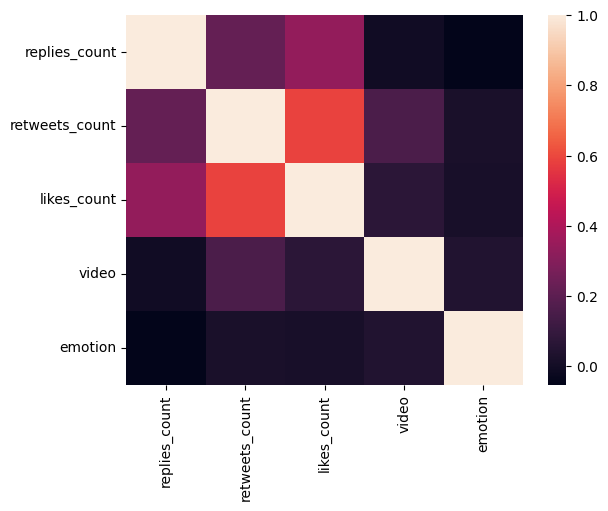

In [ ]:
sns.heatmap(data_final.corr("spearman"))

In [ ]:
data_final.columns

Index(['replies_count', 'retweets_count', 'likes_count', 'video', 'emotion'], dtype='object')

In [ ]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 18805 to 2384
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   replies_count   8000 non-null   int64
 1   retweets_count  8000 non-null   int64
 2   likes_count     8000 non-null   int64
 3   video           8000 non-null   int64
 4   emotion         8000 non-null   int64
dtypes: int64(5)
memory usage: 375.0 KB


<Axes: >

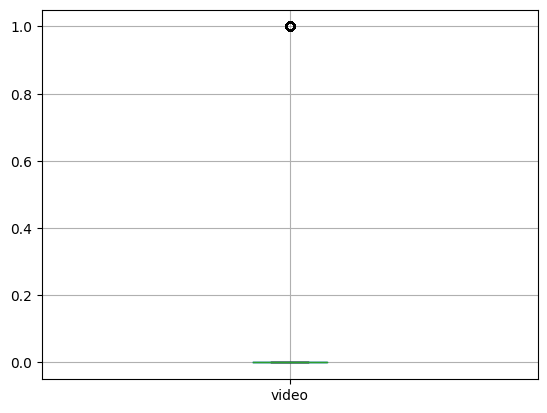

In [ ]:
data_final.boxplot(column=['video'])

<Axes: >

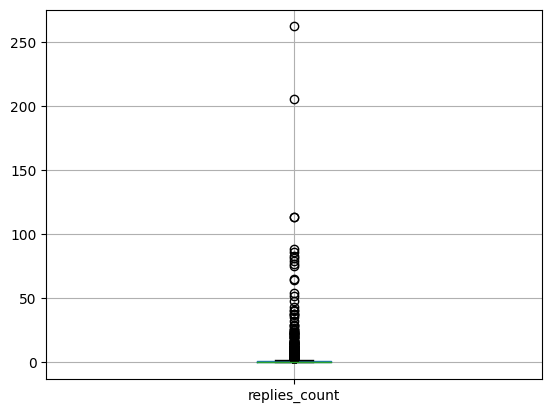

In [ ]:
data_final.boxplot(column=['replies_count'])

<Axes: >

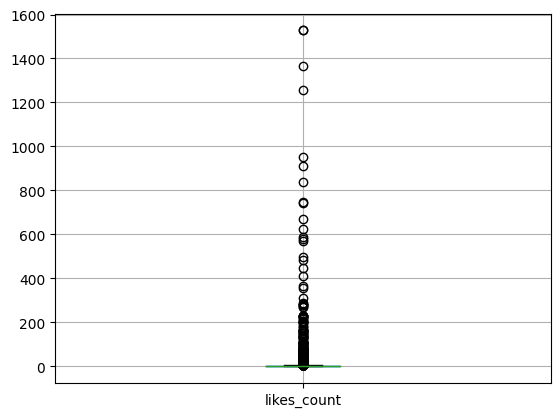

In [ ]:
data_final.boxplot(column=['likes_count'])

<Axes: >

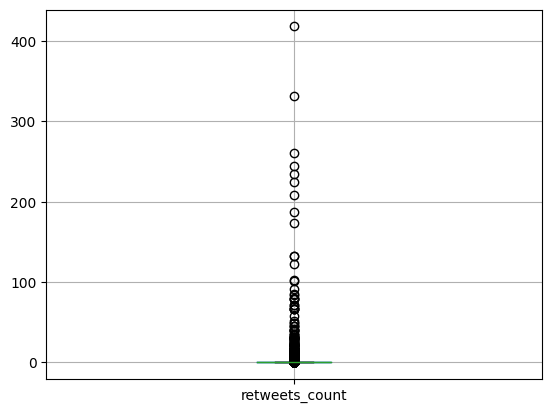

In [ ]:
data_final.boxplot(column=['retweets_count'])

In [ ]:
data_final.drop('video',axis=1,inplace=True)
X = data_final.drop(['emotion'],axis=1)
y = data_final['emotion']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression().fit(X_train,y_train)

In [ ]:
y_pred = log.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)

[[259   3 284  14]
 [272   9 341  24]
 [208   0 371  15]
 [255   5 323  17]]
              precision    recall  f1-score   support

           0       0.26      0.46      0.33       560
           1       0.53      0.01      0.03       646
           2       0.28      0.62      0.39       594
           3       0.24      0.03      0.05       600

    accuracy                           0.27      2400
   macro avg       0.33      0.28      0.20      2400
weighted avg       0.33      0.27      0.19      2400

27.333333333333332


# KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
out = knn.predict(X_test)
print(confusion_matrix(y_test,out))

[[203  56  30 271]
 [200  76  31 339]
 [158  50  40 346]
 [191  57  47 305]]


In [ ]:
print(classification_report(y_test,out))
print(accuracy_score(y_test,out)*100)

              precision    recall  f1-score   support

           0       0.27      0.36      0.31       560
           1       0.32      0.12      0.17       646
           2       0.27      0.07      0.11       594
           3       0.24      0.51      0.33       600

    accuracy                           0.26      2400
   macro avg       0.28      0.26      0.23      2400
weighted avg       0.28      0.26      0.23      2400

26.0


Text(0, 0.5, 'Error Rate')

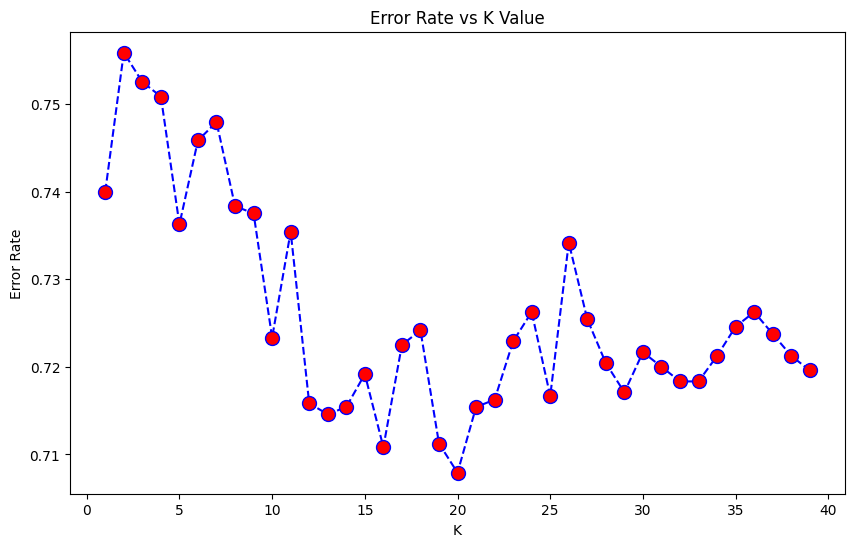

In [ ]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title("Error Rate vs K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
out = knn.predict(X_test)
print(confusion_matrix(y_test,out))

[[141  97 205 117]
 [103 140 295 108]
 [117  73 296 108]
 [121 116 239 124]]


In [ ]:
print(classification_report(y_test,out))
print(accuracy_score(y_test,out)*100)

              precision    recall  f1-score   support

           0       0.29      0.25      0.27       560
           1       0.33      0.22      0.26       646
           2       0.29      0.50      0.36       594
           3       0.27      0.21      0.23       600

    accuracy                           0.29      2400
   macro avg       0.29      0.29      0.28      2400
weighted avg       0.30      0.29      0.28      2400

29.208333333333332


# XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(max_depth=50, min_child_weight=1, n_estimators=200, n_jobs=-1, learning_rate=0.16)
model.fit(X_train, y_train)

y_p = model.predict(X_test)


from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_p)*100)

Accuracy: 29.75


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_p))
print(classification_report(y_test, y_p))

[[218  64 212  66]
 [201  99 298  48]
 [175  68 302  49]
 [198  55 252  95]]
              precision    recall  f1-score   support

           0       0.28      0.39      0.32       560
           1       0.35      0.15      0.21       646
           2       0.28      0.51      0.36       594
           3       0.37      0.16      0.22       600

    accuracy                           0.30      2400
   macro avg       0.32      0.30      0.28      2400
weighted avg       0.32      0.30      0.28      2400



# LGBM Classifier

In [ ]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier()
clf.fit(X_train, y_train)

y_p2 = clf.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_p2))
print(classification_report(y_test, y_p2))
print("Accuracy: ",accuracy_score(y_test,y_p2)*100)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000372 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 135
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 3
[LightGBM] [Info] Start training from score -1.358123
[LightGBM] [Info] Start training from score -1.419703
[LightGBM] [Info] Start training from score -1.382018
[LightGBM] [Info] Start training from score -1.386294
[[254  23 222  61]
 [230  60 300  56]
 [211  31 308  44]
 [225  31 259  85]]
              precision    recall  f1-score   support

           0       0.28      0.45      0.34       560
           1       0.41      0.09      0.15       646
           2       0.28      0.52      0.37       594
           3       0.35      0.14      0.20       600

    accuracy                           0.29      2400
   macro avg       0.33      0.30      0.27      2400
weighted avg       0.33      0.29     

# Naive Bayes Classifier

In [ ]:

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)

y_p3 = model.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_p3))
print(classification_report(y_test, y_p3))
print("Training Accuracy: ", model.score(X_train,y_train)*100)
print("Testing Accuracy: ",model.score(X_test,y_test)*100)
print("Accuracy: ",accuracy_score(y_test,y_p3)*100)

[[  6  10 526  18]
 [ 12  20 601  13]
 [  8  18 562   6]
 [  7  18 561  14]]
              precision    recall  f1-score   support

           0       0.18      0.01      0.02       560
           1       0.30      0.03      0.06       646
           2       0.25      0.95      0.40       594
           3       0.27      0.02      0.04       600

    accuracy                           0.25      2400
   macro avg       0.25      0.25      0.13      2400
weighted avg       0.25      0.25      0.13      2400

Training Accuracy:  25.96428571428571
Testing Accuracy:  25.083333333333336
Accuracy:  25.083333333333336


# Линк до податочното множество
[dataset](https://huggingface.co/datasets/Santarabantoosoo/italian_long_covid_tweets)